In [19]:
from backtest import SimpleBacktest
import pandas as pd
import numpy as np

In [3]:
# 移动平均线策略
def moving_average_strategy(data, short_window=20, long_window=50):
    if len(data) < long_window:
        return 0
    
    data = data.copy()
    data['short_ma'] = data['close'].rolling(window=short_window).mean()
    data['long_ma'] = data['close'].rolling(window=long_window).mean()
    
    current_short = data['short_ma'].iloc[-1]
    current_long = data['long_ma'].iloc[-1]
    prev_short = data['short_ma'].iloc[-2] if len(data) > 1 else current_short
    prev_long = data['long_ma'].iloc[-2] if len(data) > 1 else current_long
    
    # 金叉：买入信号
    if prev_short <= prev_long and current_short > current_long:
        return 1
    # 死叉：卖出信号
    elif prev_short >= prev_long and current_short < current_long:
        return -1
    else:
        return 0

# RSI策略
def rsi_strategy(data, period=14, oversold=30, overbought=70):
    if len(data) < period:
        return 0
    
    data = data.copy()
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    current_rsi = rsi.iloc[-1]
    
    if current_rsi < oversold:
        return 1  # 超卖，买入
    elif current_rsi > overbought:
        return -1  # 超买，卖出
    else:
        return 0

In [28]:
def generate_sample_data(days=2000, start_price=100):
    """生成示例价格数据"""
    dates = pd.date_range(start='2020-01-01', periods=days, freq='D')
    
    # 随机游走生成价格
    returns = np.random.normal(0.001, 0.02, days)
    prices = start_price * (1 + returns).cumprod()
    
    # 添加一些趋势和季节性
    trend = np.linspace(0, 0.2, days)
    seasonal = 0.1 * np.sin(2 * np.pi * np.arange(days) / 30)
    
    prices = prices * (1 + trend + seasonal)
    
    data = pd.DataFrame({
        'date': dates,
        'open': prices * (1 + np.random.normal(0, 0.01, days)),
        'high': prices * (1 + np.abs(np.random.normal(0, 0.015, days))),
        'low': prices * (1 - np.abs(np.random.normal(0, 0.015, days))),
        'close': prices,
        'volume': np.random.randint(1000000, 10000000, days)
    })
    
    return data

# 或者从文件加载真实数据
def load_data_from_csv(filepath):
    """从CSV文件加载数据"""
    data = pd.read_csv(filepath)
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date').reset_index(drop=True)
    return data

=== 回测结果 ===
初始资金: 100,000.00
最终组合价值: 28,373.73
总收益率: -71.63%
年化收益率: -18.07%
夏普比率: -1.02
最大回撤: 73.45%
总交易次数: 28

=== 交易记录 ===
BUY | 2022-02-01 00:00:00 | 价格: 149.66 | 数量: 299.0
SELL | 2022-02-14 00:00:00 | 价格: 136.40 | 数量: 299.0
BUY | 2022-02-24 00:00:00 | 价格: 170.04 | 数量: 239.0
SELL | 2022-05-07 00:00:00 | 价格: 169.89 | 数量: 239.0
BUY | 2022-06-08 00:00:00 | 价格: 174.06 | 数量: 234.0
SELL | 2022-06-19 00:00:00 | 价格: 171.95 | 数量: 234.0
BUY | 2022-07-01 00:00:00 | 价格: 190.59 | 数量: 211.0
SELL | 2022-07-13 00:00:00 | 价格: 155.99 | 数量: 211.0
BUY | 2022-07-31 00:00:00 | 价格: 193.92 | 数量: 169.0
SELL | 2022-08-18 00:00:00 | 价格: 166.77 | 数量: 169.0


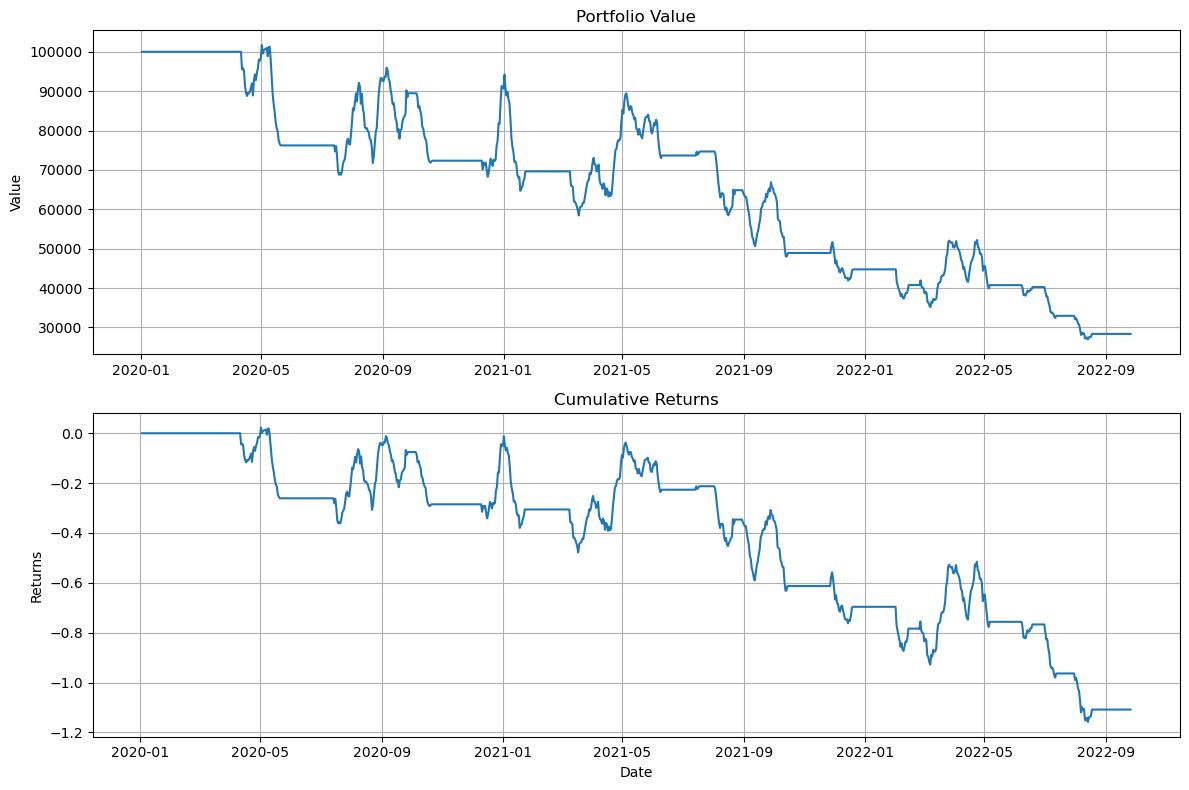

In [30]:
def main():
    # 生成示例数据
    data = generate_sample_data(1000)
    
    # 初始化回测引擎
    backtest = SimpleBacktest(initial_capital=100000)
    
    # 运行回测
    backtest.run_backtest(data, lambda x: moving_average_strategy(x, 20, 50))
    
    # 计算指标
    metrics = backtest.calculate_metrics()
    
    print("=== 回测结果 ===")
    print(f"初始资金: {backtest.initial_capital:,.2f}")
    print(f"最终组合价值: {backtest.portfolio_values[-1]:,.2f}")
    print(f"总收益率: {metrics['total_return']:.2%}")
    print(f"年化收益率: {metrics['annual_return']:.2%}")
    print(f"夏普比率: {metrics['sharpe_ratio']:.2f}")
    print(f"最大回撤: {metrics['max_drawdown']:.2%}")
    print(f"总交易次数: {metrics['total_trades']}")
    
    # 显示交易记录
    print("\n=== 交易记录 ===")
    for trade in backtest.trades[-10:]:  # 显示最后10笔交易
        print(f"{trade[0]} | {trade[1]} | 价格: {trade[2]:.2f} | 数量: {trade[3]}")
    
    # 绘制结果
    backtest.plot_results()

if __name__ == "__main__":
    main()

获取到 100 只股票
生成股票数据...
开始组合回测...
开始回测，股票数量: 100
时间范围: 2021-01-01 到 2023-12-31
每只股票资金: 20,000
进度: 10/100
进度: 20/100
进度: 30/100
进度: 40/100
进度: 50/100
进度: 60/100
进度: 70/100
进度: 80/100
进度: 90/100
进度: 100/100
PORTFOLIO BACKTEST REPORT - 沪深300股票池
测试股票数量: 100
总交易次数: 2495
组合总收益率: 24.63%
平均年化收益率: 1.57%
平均夏普比率: 0.11
平均最大回撤: 39.94%
平均胜率: 38.27%
正收益股票比例: 49.00%
最终组合价值: $2,492,539.44

表现最好的5只股票:
  000048.SZ: 897.86% (交易次数: 15)
  600040.SH: 578.48% (交易次数: 17)
  000006.SZ: 212.61% (交易次数: 15)
  600047.SH: 211.80% (交易次数: 28)
  600026.SH: 169.87% (交易次数: 17)

表现最差的5只股票:
  600030.SH: -53.11% (交易次数: 28)
  000028.SZ: -53.54% (交易次数: 30)
  000031.SZ: -63.44% (交易次数: 38)
  600004.SH: -65.65% (交易次数: 32)
  000005.SZ: -68.83% (交易次数: 29)


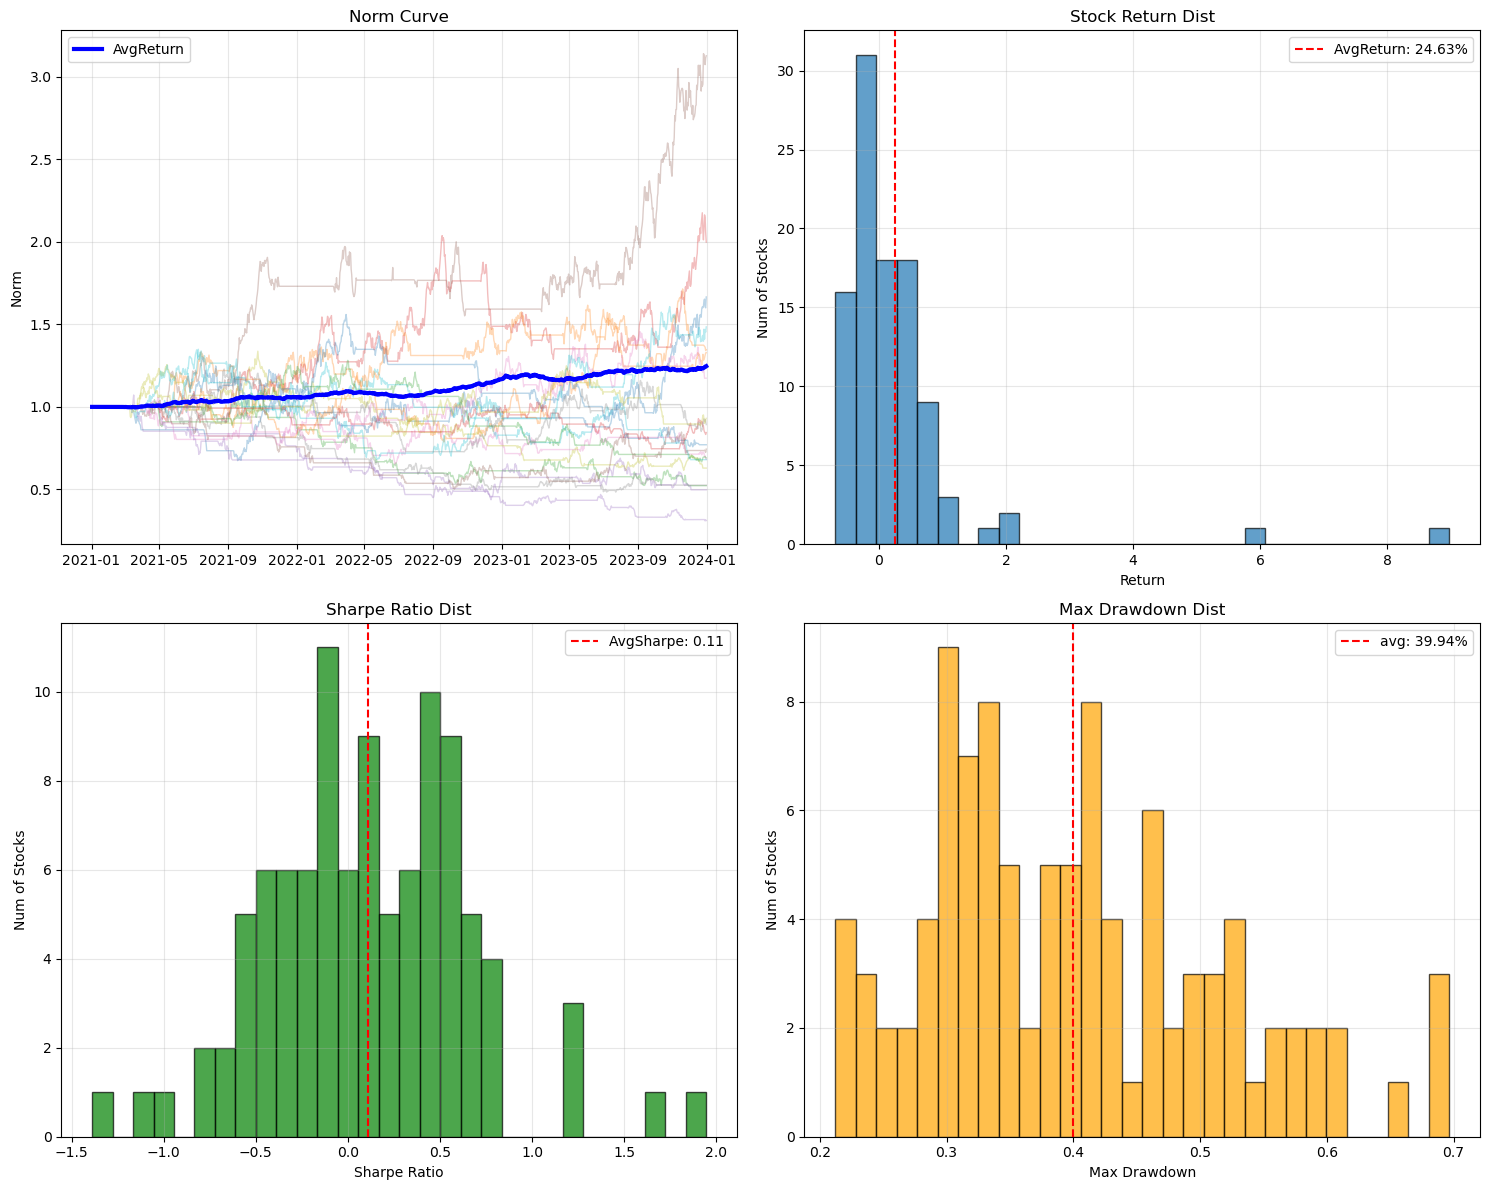

In [34]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time

class StockBacktest:
    def __init__(self, initial_capital=100000, commission=0.001, slippage=0.001):
        self.initial_capital = initial_capital
        self.capital = initial_capital
        self.positions = 0
        self.trades = []
        self.portfolio_values = []
        self.dates = []
        self.commission = commission
        self.slippage = slippage
        self.position_price = 0
        self.current_stock = None
        
    def run_backtest(self, data, strategy_function, stock_code=None):
        """
        运行单只股票的回测
        data: 包含价格数据的DataFrame，必须有'close'列
        strategy_function: 策略函数
        stock_code: 股票代码，用于记录
        """
        self.current_stock = stock_code
        self.data = data.copy()
        self.capital = self.initial_capital
        self.positions = 0
        self.trades = []
        self.portfolio_values = []
        self.dates = []
        
        for i in range(1, len(data)):
            current_data = data.iloc[:i]
            current_price = data.iloc[i]['close']
            
            # 获取日期
            if 'date' in data.columns:
                current_date = data.iloc[i]['date']
            elif hasattr(data.index[i], 'strftime'):
                current_date = data.index[i]
            else:
                current_date = i
                
            # 获取交易信号
            signal = strategy_function(current_data)
            
            # 执行交易逻辑
            self.execute_trade(signal, current_price, current_date)
            
            # 记录组合价值
            portfolio_value = self.capital + self.positions * current_price
            self.portfolio_values.append(portfolio_value)
            self.dates.append(current_date)
            
        return self.calculate_metrics()
    
    def execute_trade(self, signal, price, date):
        """执行交易，考虑交易成本"""
        if signal == 1 and self.positions == 0:  # 买入信号，空仓
            # 考虑滑点和佣金
            execution_price = price * (1 + self.slippage)
            max_shares = self.capital // (execution_price * (1 + self.commission))
            
            if max_shares > 0:
                self.positions = max_shares
                cost = self.positions * execution_price * (1 + self.commission)
                self.capital -= cost
                self.position_price = execution_price
                self.trades.append({
                    'type': 'BUY', 
                    'date': date, 
                    'price': execution_price, 
                    'shares': self.positions,
                    'cost': cost,
                    'stock': self.current_stock
                })
            
        elif signal == -1 and self.positions > 0:  # 卖出信号，持仓
            execution_price = price * (1 - self.slippage)
            revenue = self.positions * execution_price * (1 - self.commission)
            self.capital += revenue
            
            # 计算这次交易的盈亏
            profit = revenue - (self.positions * self.position_price)
            
            self.trades.append({
                'type': 'SELL', 
                'date': date, 
                'price': execution_price, 
                'shares': self.positions,
                'revenue': revenue,
                'profit': profit,
                'stock': self.current_stock
            })
            self.positions = 0
            self.position_price = 0
    
    def calculate_metrics(self):
        """计算回测指标"""
        if len(self.portfolio_values) == 0:
            return {}
            
        returns = pd.Series(self.portfolio_values).pct_change().dropna()
        
        if len(returns) == 0:
            return {}
        
        total_return = (self.portfolio_values[-1] - self.initial_capital) / self.initial_capital
        trading_days = len(self.portfolio_values)
        
        # 年化收益率（考虑实际交易天数）
        annual_return = (1 + total_return) ** (252 / trading_days) - 1 if trading_days > 0 else 0
        
        # 夏普比率
        if returns.std() > 0:
            sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
        else:
            sharpe_ratio = 0
            
        max_drawdown = self.calculate_max_drawdown()
        
        # 胜率计算
        winning_trades = len([t for t in self.trades if t.get('profit', 0) > 0])
        total_trades = len([t for t in self.trades if 'profit' in t])
        win_rate = winning_trades / total_trades if total_trades > 0 else 0
        
        return {
            'stock_code': self.current_stock,
            'initial_capital': self.initial_capital,
            'final_value': self.portfolio_values[-1] if self.portfolio_values else self.initial_capital,
            'total_return': total_return,
            'annual_return': annual_return,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'total_trades': len(self.trades),
            'win_rate': win_rate,
            'avg_trade_profit': np.mean([t.get('profit', 0) for t in self.trades if 'profit' in t]) if total_trades > 0 else 0
        }
    
    def calculate_max_drawdown(self):
        """计算最大回撤"""
        if not self.portfolio_values:
            return 0
            
        peak = self.portfolio_values[0]
        max_dd = 0
        
        for value in self.portfolio_values:
            if value > peak:
                peak = value
            dd = (peak - value) / peak
            if dd > max_dd:
                max_dd = dd
                
        return max_dd

class PortfolioBacktest:
    def __init__(self, initial_capital=1000000):
        self.initial_capital = initial_capital
        self.stock_results = {}
        self.all_trades = []
        self.portfolio_values = {}
        
    def run_stock_universe_backtest(self, stock_data_dict, strategy_function, 
                                  start_date=None, end_date=None, 
                                  capital_per_stock=100000):
        """
        遍历股票池进行回测
        
        Parameters:
        stock_data_dict: 字典，键为股票代码，值为包含股票数据的DataFrame
        strategy_function: 策略函数
        start_date: 开始日期
        end_date: 结束日期
        capital_per_stock: 每只股票分配的资金
        """
        print(f"开始回测，股票数量: {len(stock_data_dict)}")
        print(f"时间范围: {start_date} 到 {end_date}")
        print(f"每只股票资金: {capital_per_stock:,}")
        print("=" * 60)
        
        total_stocks = len(stock_data_dict)
        completed = 0
        
        for stock_code, data in stock_data_dict.items():
            # 过滤时间范围
            if start_date and end_date:
                if 'date' in data.columns:
                    mask = (data['date'] >= start_date) & (data['date'] <= end_date)
                    filtered_data = data[mask].copy()
                else:
                    mask = (data.index >= start_date) & (data.index <= end_date)
                    filtered_data = data[mask].copy()
            else:
                filtered_data = data.copy()
            
            if len(filtered_data) < 50:  # 确保有足够的数据
                continue
                
            # 运行单只股票回测
            backtest = StockBacktest(initial_capital=capital_per_stock)
            metrics = backtest.run_backtest(filtered_data, strategy_function, stock_code)
            
            # 保存结果
            self.stock_results[stock_code] = metrics
            self.all_trades.extend(backtest.trades)
            
            # 保存组合价值序列（归一化以便比较）
            if backtest.portfolio_values:
                initial_value = backtest.portfolio_values[0] if backtest.portfolio_values else 1
                normalized_values = [v / initial_value for v in backtest.portfolio_values]
                self.portfolio_values[stock_code] = {
                    'dates': backtest.dates,
                    'values': normalized_values
                }
            
            completed += 1
            if completed % 10 == 0:
                print(f"进度: {completed}/{total_stocks}")
    
    def get_portfolio_metrics(self):
        """计算组合级别的回测指标"""
        if not self.stock_results:
            return {}
            
        # 组合总收益
        total_final_value = sum(result['final_value'] for result in self.stock_results.values())
        total_initial_value = sum(result['initial_capital'] for result in self.stock_results.values())
        portfolio_return = (total_final_value - total_initial_value) / total_initial_value
        
        # 平均指标
        avg_annual_return = np.mean([r['annual_return'] for r in self.stock_results.values()])
        avg_sharpe = np.mean([r['sharpe_ratio'] for r in self.stock_results.values()])
        avg_max_dd = np.mean([r['max_drawdown'] for r in self.stock_results.values()])
        avg_win_rate = np.mean([r['win_rate'] for r in self.stock_results.values()])
        
        # 正收益股票比例
        positive_returns = len([r for r in self.stock_results.values() if r['total_return'] > 0])
        positive_ratio = positive_returns / len(self.stock_results)
        
        return {
            'portfolio_total_return': portfolio_return,
            'avg_annual_return': avg_annual_return,
            'avg_sharpe_ratio': avg_sharpe,
            'avg_max_drawdown': avg_max_dd,
            'avg_win_rate': avg_win_rate,
            'positive_return_ratio': positive_ratio,
            'total_stocks_tested': len(self.stock_results),
            'total_trades': len(self.all_trades),
            'total_final_value': total_final_value
        }
    
    def print_detailed_report(self):
        """打印详细的组合回测报告"""
        portfolio_metrics = self.get_portfolio_metrics()
        
        print("=" * 70)
        print("PORTFOLIO BACKTEST REPORT - 沪深300股票池")
        print("=" * 70)
        print(f"测试股票数量: {portfolio_metrics['total_stocks_tested']}")
        print(f"总交易次数: {portfolio_metrics['total_trades']}")
        print(f"组合总收益率: {portfolio_metrics['portfolio_total_return']:.2%}")
        print(f"平均年化收益率: {portfolio_metrics['avg_annual_return']:.2%}")
        print(f"平均夏普比率: {portfolio_metrics['avg_sharpe_ratio']:.2f}")
        print(f"平均最大回撤: {portfolio_metrics['avg_max_drawdown']:.2%}")
        print(f"平均胜率: {portfolio_metrics['avg_win_rate']:.2%}")
        print(f"正收益股票比例: {portfolio_metrics['positive_return_ratio']:.2%}")
        print(f"最终组合价值: ${portfolio_metrics['total_final_value']:,.2f}")
        print("=" * 70)
        
        # 显示表现最好和最差的股票
        if self.stock_results:
            sorted_stocks = sorted(self.stock_results.items(), 
                                 key=lambda x: x[1]['total_return'], 
                                 reverse=True)
            
            print("\n表现最好的5只股票:")
            for stock, metrics in sorted_stocks[:5]:
                print(f"  {stock}: {metrics['total_return']:.2%} (交易次数: {metrics['total_trades']})")
            
            print("\n表现最差的5只股票:")
            for stock, metrics in sorted_stocks[-5:]:
                print(f"  {stock}: {metrics['total_return']:.2%} (交易次数: {metrics['total_trades']})")
    
    def plot_portfolio_performance(self):
        """绘制组合表现"""
        if not self.portfolio_values:
            print("没有足够的数据进行绘图")
            return
            
        plt.figure(figsize=(15, 12))
        
        # 1. 所有股票的归一化收益曲线
        plt.subplot(2, 2, 1)
        for stock_code, data in list(self.portfolio_values.items())[:20]:  # 只显示前20只股票
            if len(data['dates']) > 0:
                plt.plot(data['dates'], data['values'], alpha=0.3, linewidth=1)
        
        # 计算平均曲线
        all_dates = set()
        for data in self.portfolio_values.values():
            all_dates.update(data['dates'])
        
        if all_dates:
            sorted_dates = sorted(all_dates)
            avg_values = []
            for date in sorted_dates:
                day_values = []
                for data in self.portfolio_values.values():
                    if date in data['dates']:
                        idx = data['dates'].index(date)
                        day_values.append(data['values'][idx])
                if day_values:
                    avg_values.append(np.mean(day_values))
            
            if len(avg_values) == len(sorted_dates):
                plt.plot(sorted_dates, avg_values, 'b-', linewidth=3, label='AvgReturn')
        
        plt.title('Norm Curve')
        plt.ylabel('Norm')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 2. 收益率分布
        plt.subplot(2, 2, 2)
        returns = [metrics['total_return'] for metrics in self.stock_results.values()]
        plt.hist(returns, bins=30, alpha=0.7, edgecolor='black')
        plt.axvline(x=np.mean(returns), color='red', linestyle='--', label=f'AvgReturn: {np.mean(returns):.2%}')
        plt.title('Stock Return Dist')
        plt.xlabel('Return')
        plt.ylabel('Num of Stocks')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 3. 夏普比率分布
        plt.subplot(2, 2, 3)
        sharpes = [metrics['sharpe_ratio'] for metrics in self.stock_results.values()]
        plt.hist(sharpes, bins=30, alpha=0.7, edgecolor='black', color='green')
        plt.axvline(x=np.mean(sharpes), color='red', linestyle='--', label=f'AvgSharpe: {np.mean(sharpes):.2f}')
        plt.title('Sharpe Ratio Dist')
        plt.xlabel('Sharpe Ratio')
        plt.ylabel('Num of Stocks')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 4. 最大回撤分布
        plt.subplot(2, 2, 4)
        drawdowns = [metrics['max_drawdown'] for metrics in self.stock_results.values()]
        plt.hist(drawdowns, bins=30, alpha=0.7, edgecolor='black', color='orange')
        plt.axvline(x=np.mean(drawdowns), color='red', linestyle='--', label=f'avg: {np.mean(drawdowns):.2%}')
        plt.title('Max Drawdown Dist')
        plt.xlabel('Max Drawdown')
        plt.ylabel('Num of Stocks')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# 策略函数
def enhanced_ma_strategy(data, short_window=10, long_window=30):
    """增强的移动平均策略"""
    if len(data) < long_window:
        return 0
    
    df = data.copy()
    df['short_ma'] = df['close'].rolling(window=short_window).mean()
    df['long_ma'] = df['close'].rolling(window=long_window).mean()
    
    current_short = df['short_ma'].iloc[-1]
    current_long = df['long_ma'].iloc[-1]
    
    # 需要前一个时间点的数据来判断金叉死叉
    if len(df) > 1:
        prev_short = df['short_ma'].iloc[-2]
        prev_long = df['long_ma'].iloc[-2]
    else:
        return 0
    
    # 金叉买入，死叉卖出
    if prev_short <= prev_long and current_short > current_long:
        return 1
    elif prev_short >= prev_long and current_short < current_long:
        return -1
    else:
        return 0

# 数据生成函数（模拟沪深300股票数据）
def generate_hs300_sample_data(stock_codes, start_date='2020-01-01', end_date='2023-12-31'):
    """生成沪深300股票的模拟数据"""
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    stock_data_dict = {}
    
    base_volatility = 0.02  # 基础波动率
    market_trend = np.linspace(0, 0.3, len(date_range))  # 市场整体趋势
    
    for i, code in enumerate(stock_codes):
        # 为每只股票生成不同的特征
        stock_volatility = base_volatility * (0.8 + 0.4 * np.random.random())
        stock_trend_strength = 0.5 + 0.5 * np.random.random()
        start_price = 10 + 90 * np.random.random()  # 起始价格在10-100之间
        
        # 生成收益序列
        returns = np.random.normal(0.0003 * stock_trend_strength, stock_volatility, len(date_range))
        
        # 创建价格序列，加入市场趋势和个股特性
        prices = start_price * (1 + returns).cumprod() * (1 + market_trend * stock_trend_strength)
        
        data = pd.DataFrame({
            'date': date_range,
            'open': prices * (1 + np.random.normal(0, 0.005, len(date_range))),
            'high': prices * (1 + np.abs(np.random.normal(0, 0.01, len(date_range)))),
            'low': prices * (1 - np.abs(np.random.normal(0, 0.01, len(date_range)))),
            'close': prices,
            'volume': np.random.randint(1000000, 10000000, len(date_range))
        })
        
        stock_data_dict[code] = data
    
    return stock_data_dict

# 获取沪深300股票列表（示例）
def get_hs300_stock_list():
    """获取沪深300股票列表（示例）"""
    # 这里返回示例股票代码，实际使用时可以从文件或API获取
    return [f"000{i:03d}.SZ" for i in range(1, 51)] + [f"600{i:03d}.SH" for i in range(1, 51)]

# 主函数
def main():
    # 获取股票列表
    stock_codes = get_hs300_stock_list()
    print(f"获取到 {len(stock_codes)} 只股票")
    
    # 生成模拟数据
    print("生成股票数据...")
    stock_data_dict = generate_hs300_sample_data(
        stock_codes, 
        start_date='2020-01-01', 
        end_date='2023-12-31'
    )
    
    # 创建组合回测实例
    portfolio_backtest = PortfolioBacktest(initial_capital=1000000)
    
    # 运行组合回测
    print("开始组合回测...")
    portfolio_backtest.run_stock_universe_backtest(
        stock_data_dict=stock_data_dict,
        strategy_function=lambda x: enhanced_ma_strategy(x, 15, 50),
        start_date='2021-01-01',
        end_date='2023-12-31',
        capital_per_stock=20000  # 每只股票分配2万元
    )
    
    # 生成报告
    portfolio_backtest.print_detailed_report()
    
    # 绘制结果
    portfolio_backtest.plot_portfolio_performance()

if __name__ == "__main__":
    main()